<a href="https://colab.research.google.com/github/kalp121212/DS203_Project/blob/main/Shanghai_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = 15,10
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/kalp121212/DS203_Project/main/Datasets/Shanghai/shanghai-world-university-ranking.csv?token=ARGZ7PMUE2E5OBT6ZNWD4ETBTVVY6',
                  sep = ';')

In [4]:
df

,PCP,University,Total score,Alumni,Award,World rank,PUB,National rank,Year,N&S,Hi Ci,World rank integer,Country,Geo Point 2D,Geo Shape,ISO2 CODE,ISO3 CODE
0,27.3,University of Bristol,28.4,7.7,16.8,70,45.3,8,2012,29.6,28.9,70,United Kingdom,"53.9147734806,-2.8531353952","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-5...",GB,GBR
1,17.1,University of Florida,27.9,18.0,0.0,72,60.4,44,2012,20.0,37.4,72,United States,"45.7056295354,-112.599438377","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-1...",US,USA
2,30.0,Rice University,25.1,17.1,22.4,91,30.6,50,2012,23.9,21.5,91,United States,"45.7056295354,-112.599438377","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-1...",US,USA
3,22.2,Case Western Reserve University,24.3,32.1,11.2,99,39.3,53,2012,18.7,21.7,99,United States,"45.7056295354,-112.599438377","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-1...",US,USA
4,33.5,University College London,47.1,27.8,35.8,16,77.0,3,2017,39.6,47.6,16,United Kingdom,"53.9147734806,-2.8531353952","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-5...",GB,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7100,16.7,The University of Tokushima,NaN,13.4,0.0,401-500,21.5,13-16,2018,6.7,9.6,401,Japan,"37.6631108117,138.064962133","{""type"": ""MultiPolygon"", ""coordinates"": [[[[13...",JP,JPN
7101,14.4,University of Bayreuth,NaN,0.0,0.0,401-500,23.0,27-37,2017,14.1,10.9,401,Germany,"51.1337226904,10.2884850927","{""type"": ""Polygon"", ""coordinates"": [[[9.921906...",DE,DEU
7102,18.8,Tokyo University of Science,NaN,12.4,0.0,401-500,24.4,13-16,2018,5.7,9.6,401,Japan,"37.6631108117,138.064962133","{""type"": ""MultiPolygon"", ""coordinates"": [[[[13...",JP,JPN
7103,18.5,RMIT University,NaN,0.0,0.0,401-500,30.5,22-23,2016,0.0,10.3,401,Australia,"-25.7306547797,134.502775475","{""type"": ""MultiPolygon"", ""coordinates"": [[[[14...",AU,AUS


---
Drop useless columns

In [5]:
df['World rank'] = df['World rank integer']
df = df.drop(columns = ['Geo Shape', 'ISO2 CODE', 'ISO3 CODE', 'World rank integer'])

In [6]:
print(df.info())
pass

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PCP            7105 non-null   float64
 1   University     7105 non-null   object 
 2   Total score    1403 non-null   float64
 3   Alumni         7105 non-null   float64
 4   Award          7105 non-null   float64
 5   World rank     7105 non-null   int64  
 6   PUB            7105 non-null   float64
 7   National rank  7105 non-null   object 
 8   Year           7105 non-null   int64  
 9   N&S            7082 non-null   float64
 10  Hi Ci          7105 non-null   float64
 11  Country        7100 non-null   object 
 12  Geo Point 2D   7100 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 721.7+ KB
None


Total score is missing for most rows. </br>
Calculate to total score as follows:
**<code>Total score</code>** = (0.1$\times$**<code>Alumni</code>**) + (0.2$\times$**<code>Award</code>**)+(0.2$\times$**<code>Hi Ci</code>**)+(0.2$\times$**<code>N & S</code>**) + (0.2$\times$**<code>PCP</code>**)+(0.1$\times$**<code>PUB</code>**)




In [7]:
# Verify the above formula by checking the RMS difference between calculated and given scores.
df_not_null = df.dropna()
calc_scores = 0.1*df_not_null['Alumni']+0.2*df_not_null['Award']+0.2*df_not_null['Hi Ci']+0.2*df_not_null['N&S']+0.1*df_not_null['PCP']+0.2*df_not_null['PUB']
print((calc_scores-df_not_null['Total score']).std())

0.3688525915950421


In [8]:
df['Total score'] = 0.1*df['Alumni']+0.2*df['Award']+0.2*df['Hi Ci']+0.2*df['N&S']+0.1*df['PCP']+0.2*df['PUB']

In [9]:
# Check number entries and number of incomplete rows by year
df_not_null = df.dropna()
years = list(set(df['Year']))
years.sort()
occs = [[year, sum(df['Year'] == year), sum(df_not_null['Year'] == year)] for year in years]
print(tabulate(occs, headers = ['Year', '# Values', '# NON NA ROWS']))

  Year    # Values    # NON NA ROWS
------  ----------  ---------------
  2005         507              505
  2006         507              505
  2007         518              516
  2008         511              509
  2009         508              506
  2010         508              506
  2011         507              504
  2012         507              506
  2013         505              504
  2014         507              504
  2015         507              504
  2016         506              502
  2017         503              502
  2018         504              504


In [11]:
# Drop rows missing any entries
df = df.dropna()
df = df.set_index(pd.Index(list(range(len(df)))))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 0 to 7076
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PCP            7077 non-null   float64
 1   University     7077 non-null   object 
 2   Total score    7077 non-null   float64
 3   Alumni         7077 non-null   float64
 4   Award          7077 non-null   float64
 5   World rank     7077 non-null   int64  
 6   PUB            7077 non-null   float64
 7   National rank  7077 non-null   object 
 8   Year           7077 non-null   int64  
 9   N&S            7077 non-null   float64
 10  Hi Ci          7077 non-null   float64
 11  Country        7077 non-null   object 
 12  Geo Point 2D   7077 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 774.0+ KB


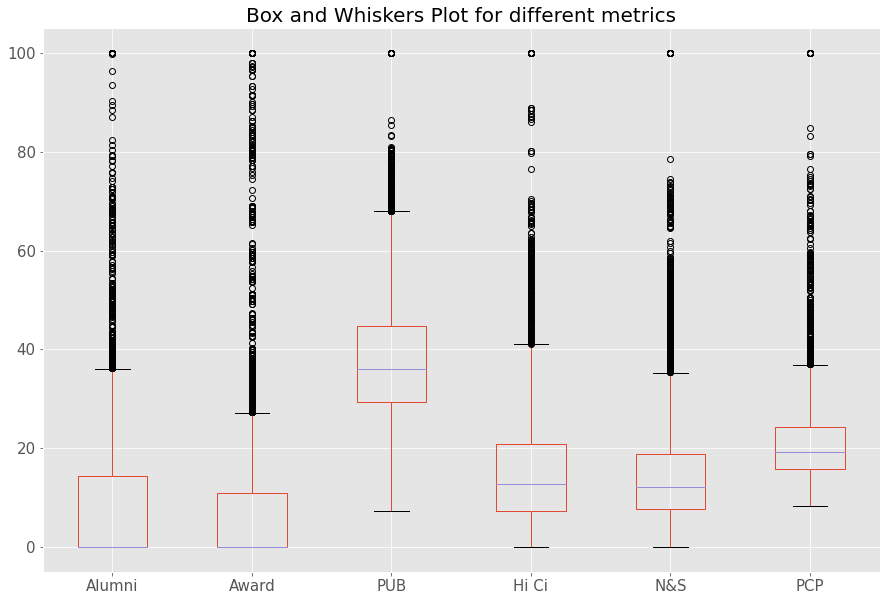

In [12]:
score_metrics = ['Alumni','Award','PUB','Hi Ci','N&S','PCP']
df.boxplot(column = score_metrics, fontsize = 15)
plt.title('Box and Whiskers Plot for different metrics',fontdict={'fontsize':20})
pass

In [13]:
table = [[i, metric, df[metric].std(0), df[metric].mean(), df[metric].median()] for i,metric in enumerate(score_metrics)]
print(tabulate(table, headers = ['No.', 'Score metric', 'Standard Deviation', 'Mean', 'Median'], floatfmt=".2f"))

  No.  Score metric      Standard Deviation    Mean    Median
-----  --------------  --------------------  ------  --------
    0  Alumni                         13.41    8.32      0.00
    1  Award                          14.89    7.01      0.00
    2  PUB                            12.74   38.31     36.10
    3  Hi Ci                          13.80   15.82     12.80
    4  N&S                            12.02   15.28     12.20
    5  PCP                             9.05   21.35     19.30


**Observations**


*   The **<code>Alumni</code>** and **<code>Award</code>** metrcs are **terribly skewed** shuch that the scores are almost $0$ for most universities. These account for a total of $\mathbf{30\%}$ of the total scores.
*   **<code>Hi Ci</code>**, **<code>N&S</code>** and **<code>PCP</code>** have nearly identical distribution but are **leftward skewed**. Their combined weightage is $\mathbf{60\%}$.
*   The **<code>PUB</code>** scores are more **judicially distributed**. This contributes to only $\mathbf{10\%}$ of the total scores.



Text(0.5, 1.0, 'Heatmap of Score Metrics')

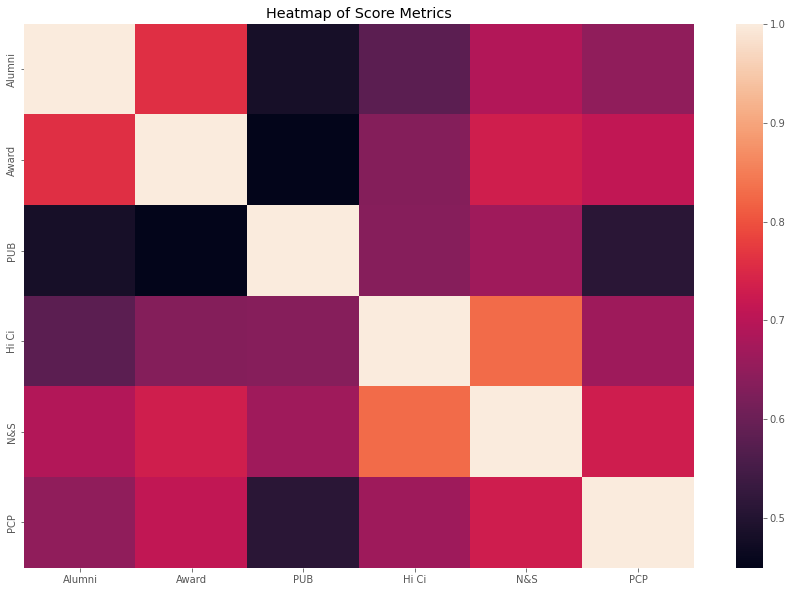

In [14]:
sns.heatmap(df[score_metrics].corr())
plt.title(f"Heatmap of Score Metrics")

In [15]:
df_all_years = df
df = {}

In [16]:
min_year = min(df_all_years['Year'])
max_year = max(df_all_years['Year'])
for year in range(min_year,max_year+1):
  df[year] = df_all_years[df_all_years['Year'] == year]
  df[year] = df[year].sort_values(by = ['Total score'], ascending = False)
  df[year] = df[year].set_index(pd.Index(range(len(df[year]))))
  df[year] = df[year].drop(columns = ['Year'])

  df[year]['World rank'] = list(range(1,len(df[year])+1))
  for i in range(1,len(df[year])):
    if df[year]['Total score'][i] == df[year]['Total score'][i-1]:
      df[year]['World rank'][i] = df[year]['World rank'][i-1]

print('Starting year: ',min_year)
print('Last year: ',max_year)

Starting year:  2005
Last year:  2018


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/i

In [17]:
df[2010]

,PCP,University,Total score,Alumni,Award,World rank,PUB,National rank,N&S,Hi Ci,Country,Geo Point 2D
0,69.2,Harvard University,96.92,100.0,100.0,1,100.0,1,100.0,100.0,United States,"45.7056295354,-112.599438377"
1,54.2,"University of California, Berkeley",70.14,67.6,79.3,2,70.6,2,70.9,69.0,United States,"45.7056295354,-112.599438377"
2,50.1,Stanford University,69.85,40.2,78.4,3,69.7,3,68.4,87.6,United States,"45.7056295354,-112.599438377"
3,64.5,Massachusetts Institute of Technology (MIT),69.22,70.5,80.3,4,61.4,4,70.1,66.8,United States,"45.7056295354,-112.599438377"
4,53.1,University of Cambridge,67.46,88.5,92.6,5,65.7,1,54.3,53.9,United Kingdom,"53.9147734806,-2.8531353952"
...,...,...,...,...,...,...,...,...,...,...,...,...
501,19.7,Tokyo University of Agriculture and Technology,8.79,0.0,0.0,502,23.6,18-25,3.3,7.2,Japan,"37.6631108117,138.064962133"
502,15.2,Kyung Hee University,8.78,0.0,0.0,503,34.8,8-10,1.5,0.0,"Korea, Republic of","36.4275986041,127.821317128"
503,13.9,Brunel University,8.75,0.0,0.0,504,25.1,36-38,1.5,10.2,United Kingdom,"53.9147734806,-2.8531353952"
504,13.4,Indian Institute of Technology Kharagpur,8.74,0.0,0.0,505,29.8,2,0.0,7.2,India,"22.9250064074,79.5937037633"


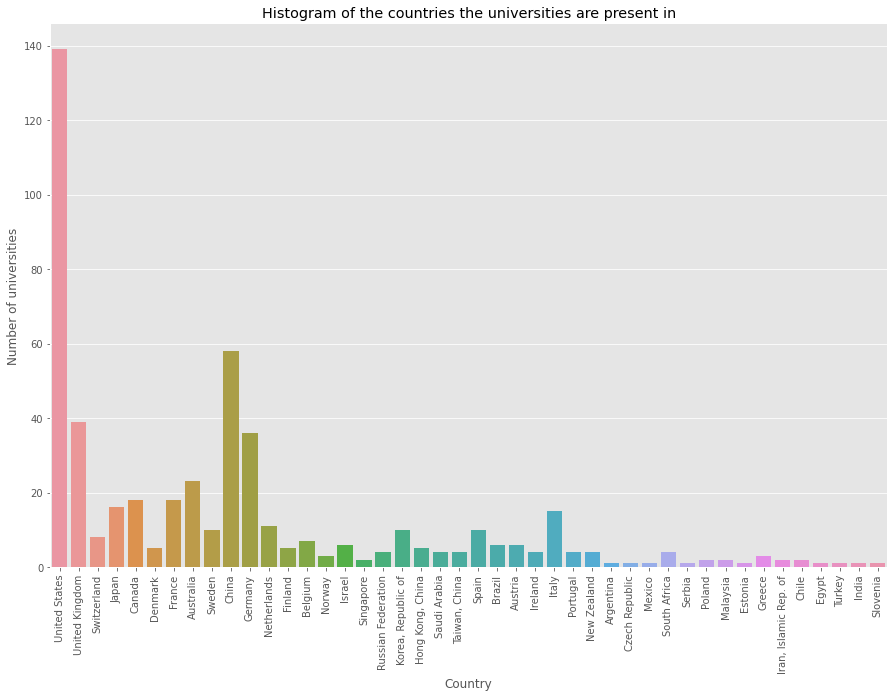

In [18]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
sns.countplot(data=df[2018],x="Country")
plt.title("Histogram of the countries the universities are present in")
plt.ylabel("Number of universities")
plt.show()

In [19]:
entropy = []
for i in range(min_year,max_year+1):
  counts = np.array(list(df[year]['Country'].value_counts()))
  counts = counts/np.sum(counts)
  entropy += [-np.sum(counts*np.log(counts))]

table = [[year, entropy[year-min_year], max(df[year]['World rank']), len(df[year])] for year in range(min_year,max_year+1)]
print(tabulate(table, headers = ['Year', 'Entropy', 'Maximum Rank', '# Rows']))

  Year    Entropy    Maximum Rank    # Rows
------  ---------  --------------  --------
  2005    2.87163             505       505
  2006    2.87163             505       505
  2007    2.87163             516       516
  2008    2.87163             509       509
  2009    2.87163             505       506
  2010    2.87163             505       506
  2011    2.87163             504       504
  2012    2.87163             506       506
  2013    2.87163             504       504
  2014    2.87163             504       504
  2015    2.87163             504       504
  2016    2.87163             502       502
  2017    2.87163             502       502
  2018    2.87163             504       504


Same number of universities from different countries every year.

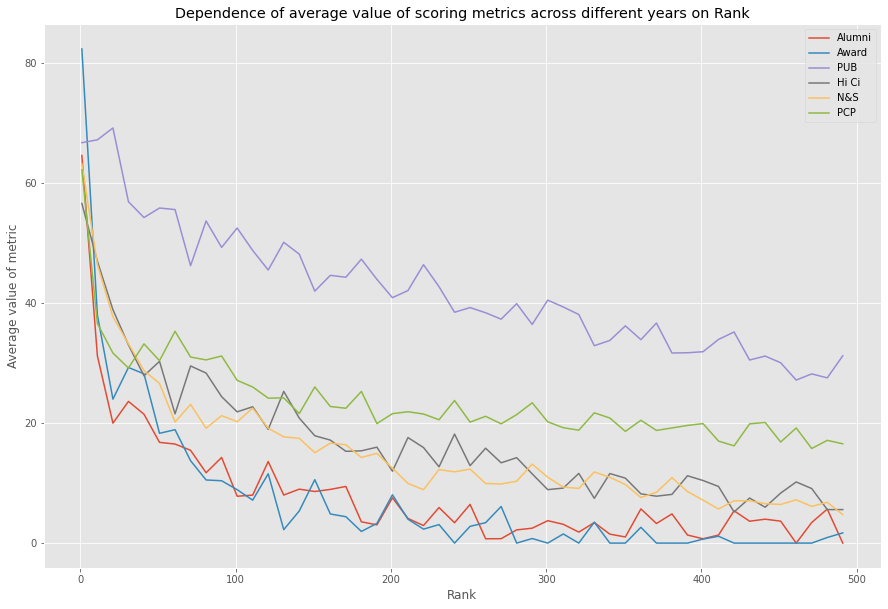

In [20]:
for metric in score_metrics:
  scores = []
  ranks = list(range(1,500,10))
  diff = 10
  for rank in ranks:
    score = 0
    num_scores = 0
    for i in range(min_year,max_year+1):
      score += sum(df[year][np.logical_and(rank <= np.array(df[year]['World rank']), np.array(df[year]['World rank']) <rank+ diff)][metric])
      num_scores += len(df[year][np.logical_and(rank <= np.array(df[year]['World rank']), np.array(df[year]['World rank']) <rank+ diff)])
    if num_scores != 0:
      avg_score = score/num_scores
    else:
      avg_score = 0
    scores += [avg_score]
  plt.plot(ranks, scores, label = metric)

plt.xlabel('Rank')
plt.ylabel('Average value of metric')
plt.title('Dependence of average value of scoring metrics across different years on Rank')
plt.legend()
pass

In [21]:
colleges = []
for year in range(min_year,max_year+1):
  colleges += list(df[year]['University'])

colleges = list(set(colleges))

In [22]:
college_v_rank = {}
college_v_score = {}
for college in colleges:
  ranks = []
  scores = []
  for year in range(min_year,max_year+1):
    if college in list(df[year]['University']):
      ranks += [df[year]['World rank'][list(df[year]['University']).index(college)]]
      scores+= [df[year]['Total score'][list(df[year]['University']).index(college)]]
  college_v_rank[college] = ranks
  college_v_score[college] = scores

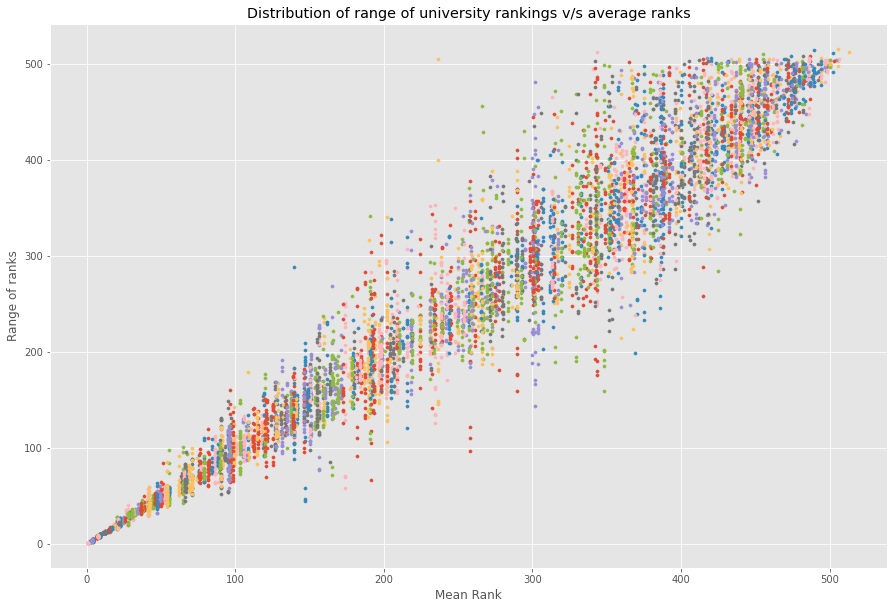

In [23]:
for college in colleges:
  ranks = college_v_rank[college]
  mean_rank = sum(ranks)/len(ranks)
  plt.scatter([mean_rank]*len(ranks), ranks, s= 10)
plt.xlabel('Mean Rank')
plt.ylabel('Range of ranks')
plt.title('Distribution of range of university rankings v/s average ranks')
pass

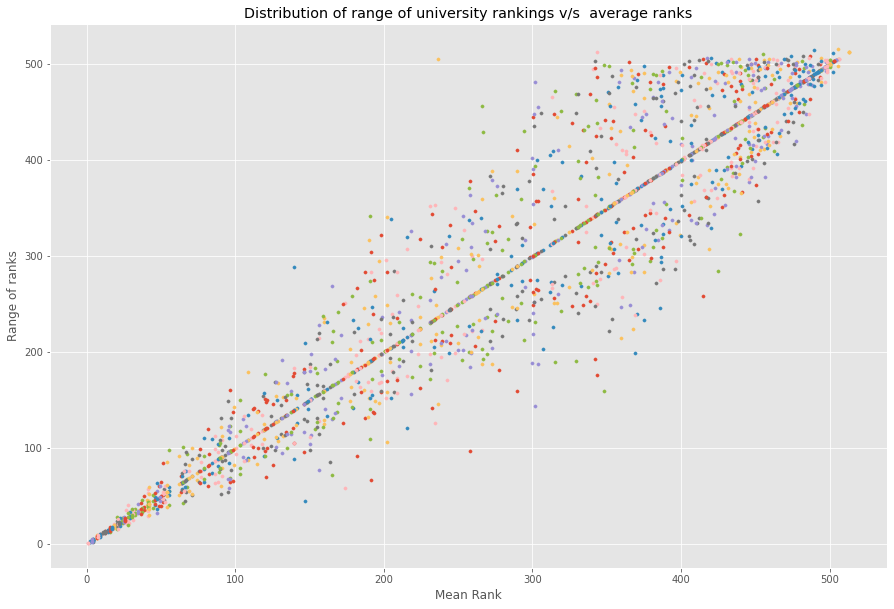

In [24]:
for college in colleges:
  ranks = college_v_rank[college]
  mean_rank = sum(ranks)/len(ranks)
  plt.scatter([mean_rank]*3, [min(ranks),mean_rank,max(ranks)], s = 10)
plt.xlabel('Mean Rank')
plt.ylabel('Range of ranks')
plt.title('Distribution of range of university rankings v/s  average ranks')
pass

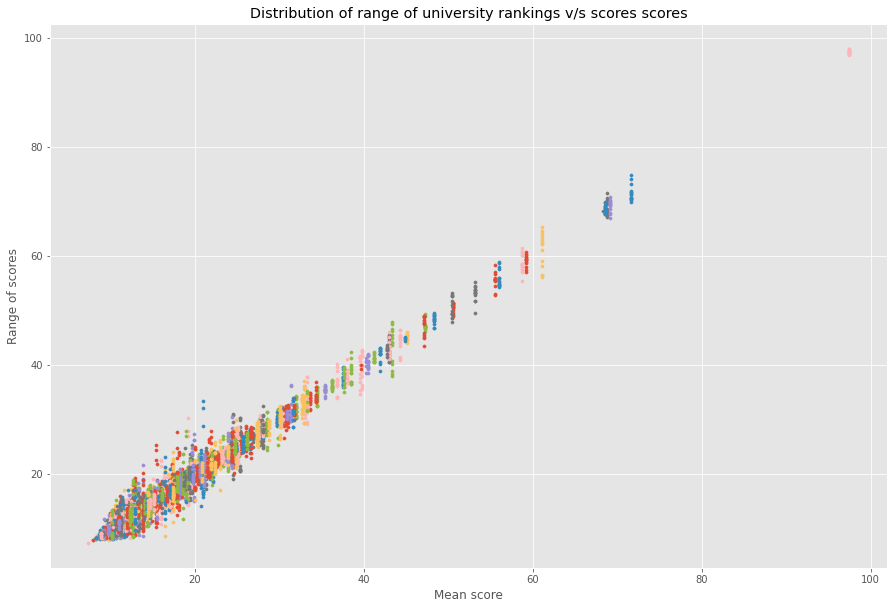

In [25]:
for college in colleges:
  scores = college_v_score[college]
  mean_score = sum(scores)/len(scores)
  plt.scatter([mean_score]*len(scores), scores, s= 10)
plt.xlabel('Mean score')
plt.ylabel('Range of scores')
plt.title('Distribution of range of university rankings v/s scores scores')
pass

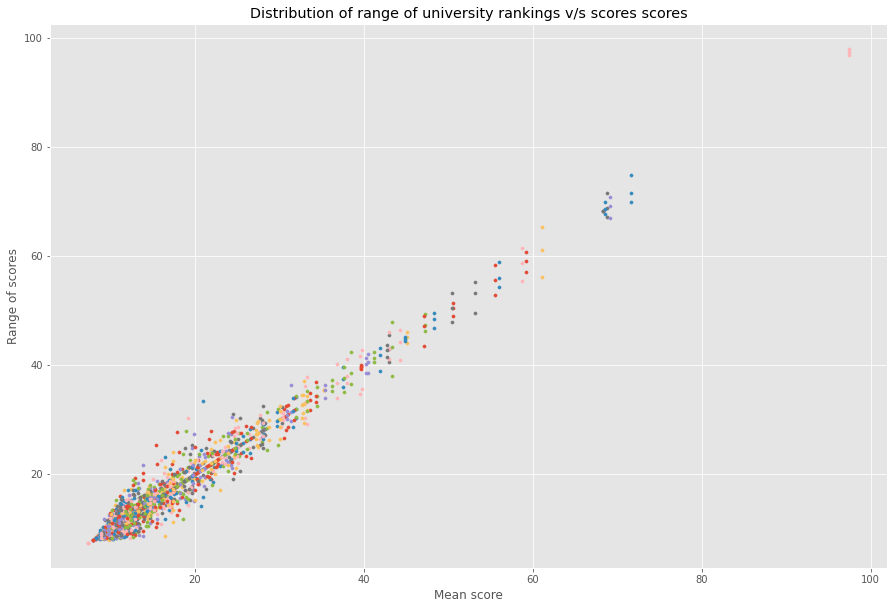

In [26]:
for college in colleges:
  scores = college_v_score[college]
  mean_score = sum(scores)/len(scores)
  plt.scatter([mean_score]*3, [min(scores), mean_score, max(scores)], s= 10)
plt.xlabel('Mean score')
plt.ylabel('Range of scores')
plt.title('Distribution of range of university rankings v/s scores scores')
pass

In [ ]:
!pip install pycountry_convert

In [29]:
import pycountry_convert as pc

In [44]:
def country_to_continent(country):
  if ',' in country:
    i = country.index(',')
    country = country[:i]
  if country == 'Korea':
    return 'Asia'
  country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
  continent_name = pc.country_alpha2_to_continent_code(country_code)
  continents = {
      'NA': 'North America',
      'SA': 'South America', 
      'AS': 'Asia',
      'OC': 'Australia',
      'AF': 'Africa',
      'EU': 'Europe'
  }
  return continents[continent_name]

In [45]:
for year in  range(min_year,max_year+1):
  df[year]['Continent'] = df[year]['Country'].apply(country_to_continent)

In [46]:
df[2018]

,PCP,University,Total score,Alumni,Award,World rank,PUB,National rank,N&S,Hi Ci,Country,Geo Point 2D,Continent
0,79.6,Harvard University,97.96,100.0,100.0,1,100.0,1,100.0,100.0,United States,"45.7056295354,-112.599438377",North America
1,56.0,Stanford University,74.09,44.5,88.5,2,76.5,2,78.6,76.6,United States,"45.7056295354,-112.599438377",North America
2,59.5,University of Cambridge,70.30,82.3,95.4,3,70.9,1,57.6,56.7,United Kingdom,"53.9147734806,-2.8531353952",Europe
3,70.3,Massachusetts Institute of Technology (MIT),68.50,70.9,83.6,4,64.4,3,71.4,52.5,United States,"45.7056295354,-112.599438377",North America
4,58.2,"University of California, Berkeley",66.90,65.6,78.4,5,65.1,4,67.8,61.3,United States,"45.7056295354,-112.599438377",North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,14.0,Beijing Institute of Technology,10.20,0.0,0.0,500,42.5,36-51,1.5,0.0,China,"36.5550685352,103.883616289",Asia
500,13.7,MINES ParisTech,10.19,13.4,24.6,501,8.9,18-19,3.9,0.0,France,"42.4577181048,-2.88059919144",Europe
501,13.8,"National University of Ireland, Galway",10.18,0.0,0.0,502,23.8,3-4,6.7,13.5,Ireland,"53.18059121,-8.01023654487",Europe
502,23.1,Medical University of Innsbruck,10.17,0.0,0.0,503,22.6,5-6,7.1,9.6,Austria,"47.6139487927,14.0761588843",Europe


In [49]:
continents = [
      'North America',
      'South America', 
      'Europe',
      'Africa',
      'Asia',
      'Australia',
]

In [53]:
continent_info = {}
for year in range(min_year,max_year+1):
  scores = {}
  num_univs = {}
  for continent in continents:
    scores[continent] = 0
    num_univs[continent] = 0
  for i in range(len(df[year])):
    scores[df[year]['Continent'][i]] += df[year]['Total score'][i]
    num_univs[df[year]['Continent'][i]] += 1
  continent_info[year] = {'scores':scores, 'num_univs':num_univs}

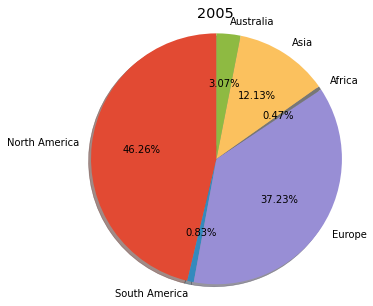

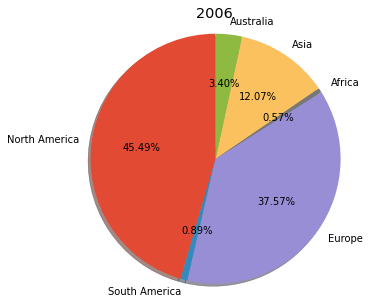

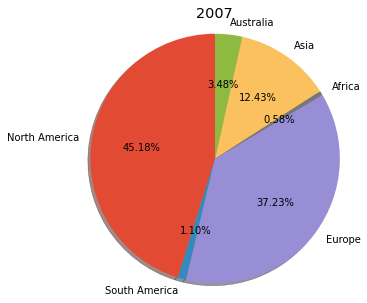

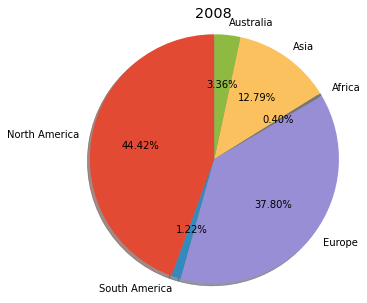

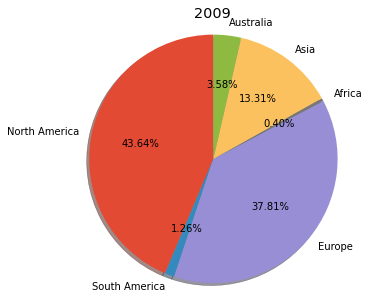

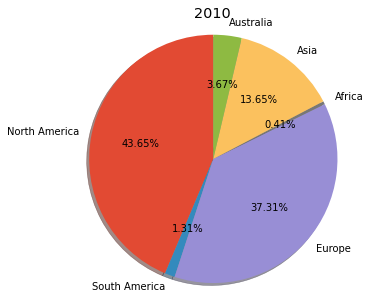

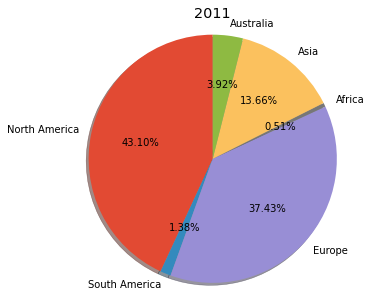

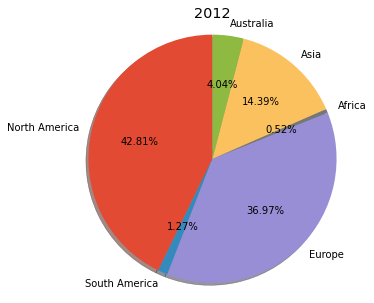

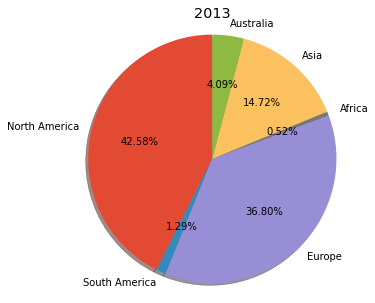

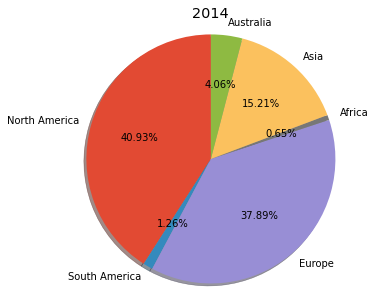

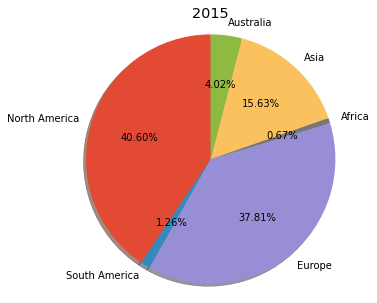

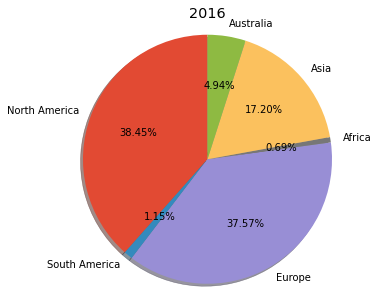

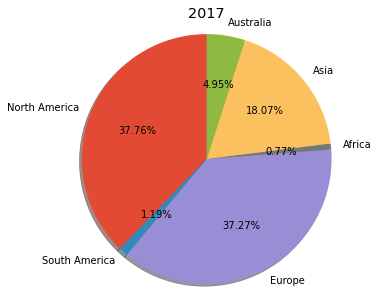

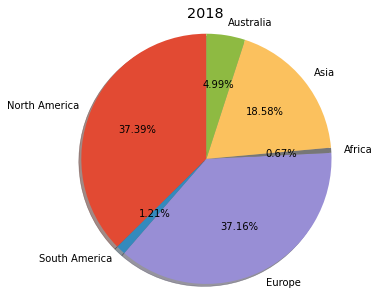

In [73]:
# Total score of univs in a continent
plt.rcParams['figure.figsize'] = 5,5
for year in range(min_year,max_year+1):
  labels = continents
  sizes = [continent_info[year]['scores'][continent] for continent in continents]

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
          shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title(str(year))
plt.show()

### **The above pi charts show the distrbution of cumulative total scores of all universities in a continent**
- The share of **North American** universities have **decreased significantly** from 46.3 % in min_year to 37.4% in max_year.
- The share of **European** Universities have **remained** pretty much **constant** through the years. 
- The share of **South American** universities **increased slightly** from 0.8% to around 1.2% and has remained pretty much **constant in later years**.
- The **Asian and Australian universities** have steadily grown in shares. Asia went from 12.1% to 18.6% while Australia went from 3.1% to 5%.
- Even **Africa** has shown **slight improvements** going from 0.47% to 0.67% in peaking at around 0.77%.
- Europe might overtake N America
> **The trends show that the education quality is slowly shifting from the west to the east**.

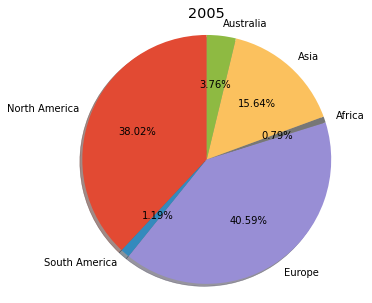

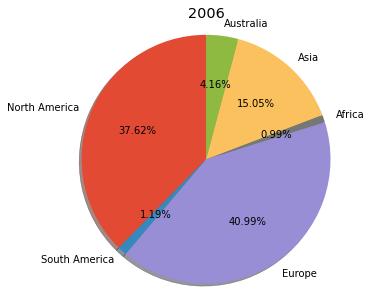

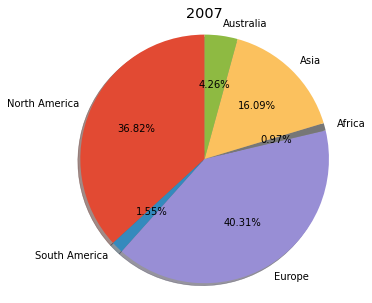

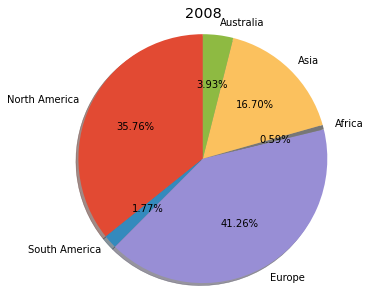

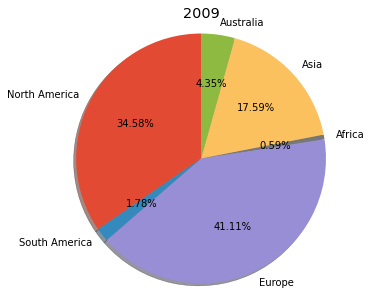

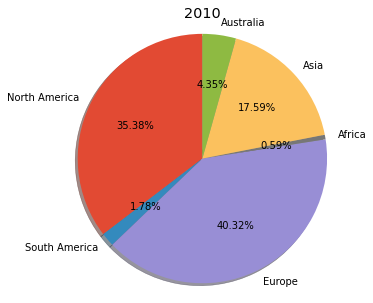

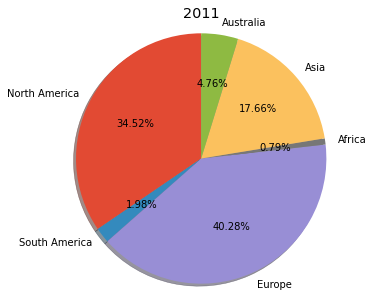

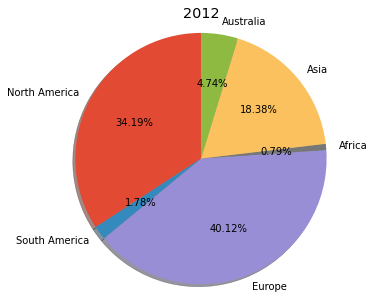

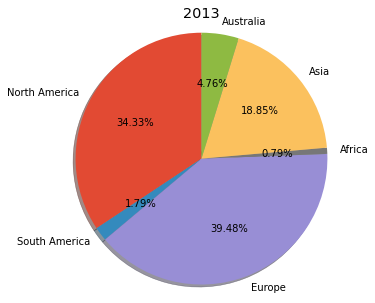

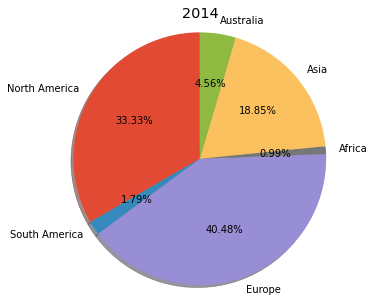

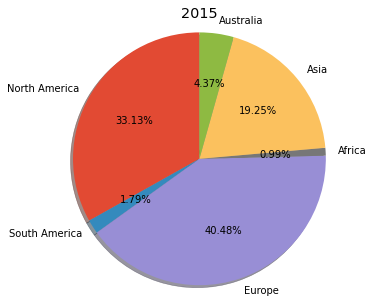

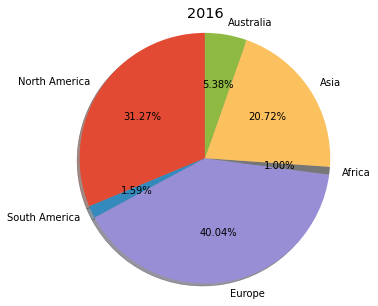

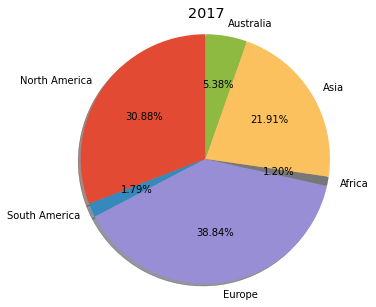

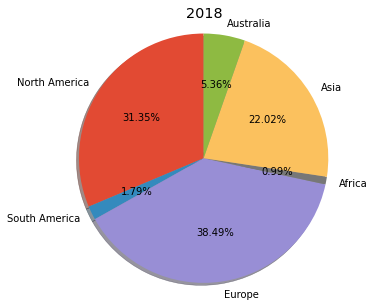

In [71]:
# Number of universities vs continent
plt.rcParams['figure.figsize'] = 5,5
for year in range(min_year,max_year+1):
  labels = continents
  sizes = [continent_info[year]['num_univs'][continent] for continent in continents]

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
          shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title(str(year))
plt.show()

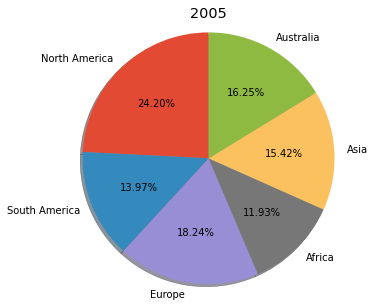

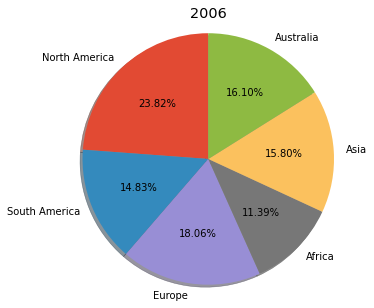

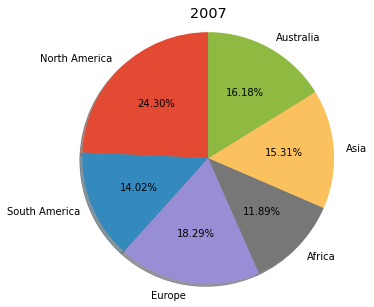

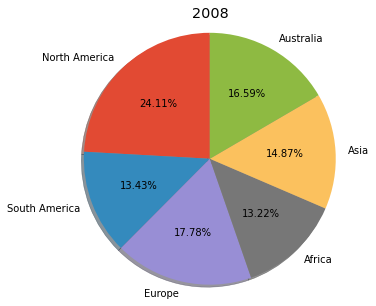

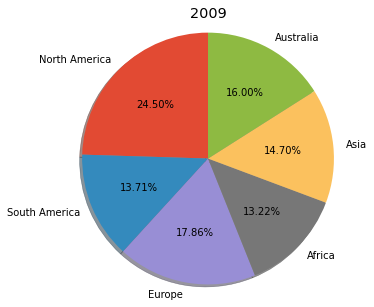

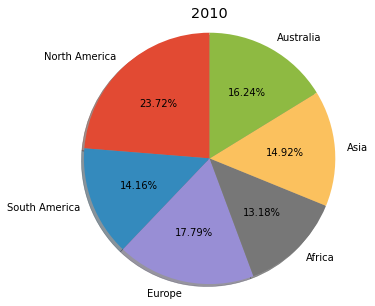

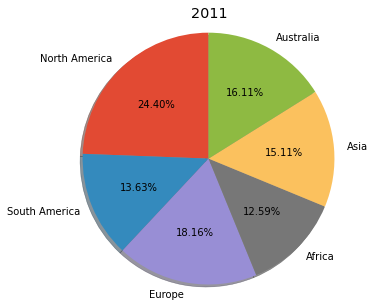

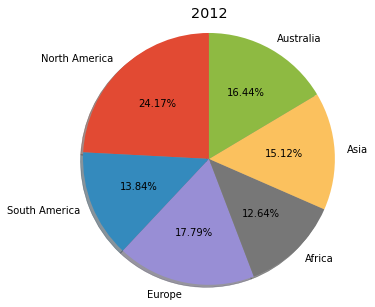

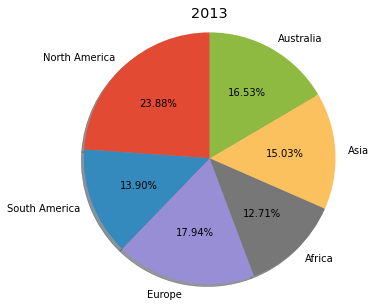

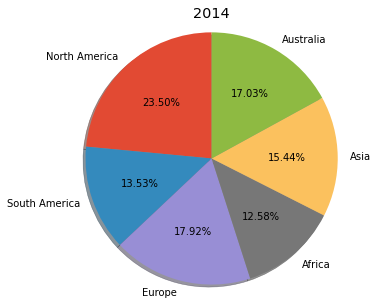

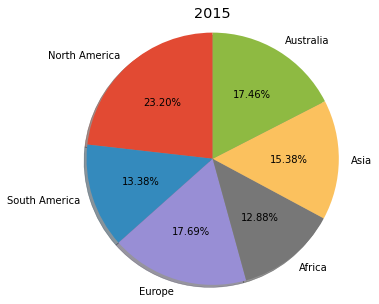

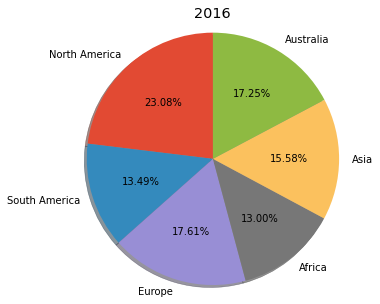

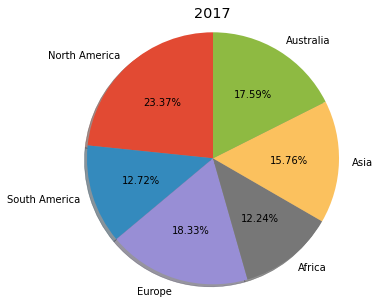

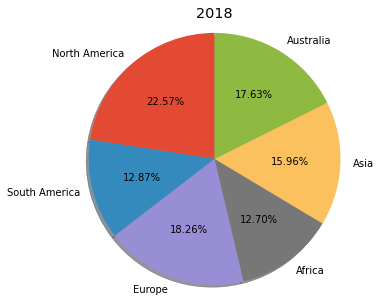

In [72]:
# Average university score vs continent

plt.rcParams['figure.figsize'] = 5,5
for year in range(min_year,max_year+1):
  labels = continents
  sizes = [continent_info[year]['scores'][continent]/continent_info[year]['num_univs'][continent] for continent in continents]

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
          shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title(str(year))
plt.show()